This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games

attribute info :
- #: ID for each pokemon
- 1Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
- The data for this table has been acquired from several different sites, including:

https://pokemondb.net/


<h1>Pokenon DataSet<h1>
        My goal is to determine if it is possible to predict whether a pokemon is Legendary or  not based on his stats 

In [1]:
# basic packages i'll probably need to the code
%pylab inline
import pandas as pd
import seaborn as sns
import scipy.stats as sts
sns.set(style='ticks', font_scale=2, rc={"lines.linewidth": 3})

Populating the interactive namespace from numpy and matplotlib


In [2]:
pokenon = pd.read_csv("Pokemon.csv")
pokenon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 1.Data cleaning and verifying

In [3]:
# check is there in null
num_null = pokenon.isnull().sum()
print(f"The number of null values are: {num_null.sum()}")

The number of null values are: 386


In [4]:
print(f"Lets check which value has null valeus: {num_null}")

Lets check which value has null valeus: #               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


<h1>Reasons for null Values<h1>
not all pokemon has 2 types, i'll fill missing values with Type 1


In [5]:
#i'll fill empty Type 2 Values with first Type
pokenon["Type 2"].fillna(pokenon["Type 1"],inplace=True)
num_null = pokenon.isnull().sum()
print(f"The number of null values are: {num_null.sum()}")

The number of null values are: 0


In [6]:
num_dupli = pokenon.duplicated().sum()
print(f"The number of duplicated values are: {num_dupli}")

The number of duplicated values are: 0


In [7]:
# setting name as index, and droping index values 
pokenon.set_index("Name",inplace=True)
pokenon.drop("#",axis=1,inplace=True) # removing the indexing number from df
pokenon.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


## changing the Legendary from True / False to 0/1

In [8]:
##pokenon["Legendary"] = pokenon["Legendary"].map({False:"NO",True:"YES"})
pokenon["Legendary"] = pokenon["Legendary"].map({False:0,True:1})

# 2.Data visuazlizing 

## 2.1 - for categories 

# First i'll display the values of all pokemons

## 2.1.1 - data countplot for types 1 pokemon

In [9]:
Type_1 = ",".join(pokenon["Type 1"].unique())
print(f"The type of pokemon are:\n{Type_1}")

The type of pokemon are:
Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying


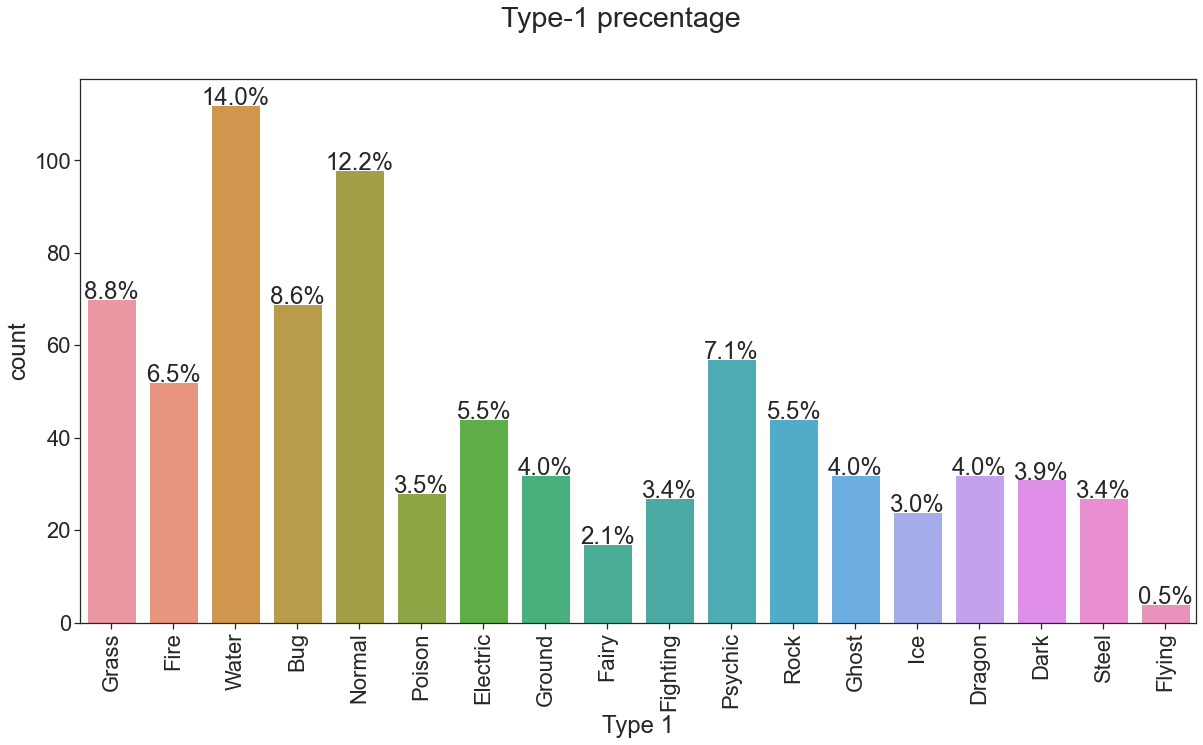

In [10]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('Type-1 precentage')
xticks(rotation=90)
sns.countplot(x ='Type 1', data = pokenon)
for p in ax.patches:
    total = float(len(pokenon["Type 1"]))
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


## 2.1.2 - data countplot for types 2

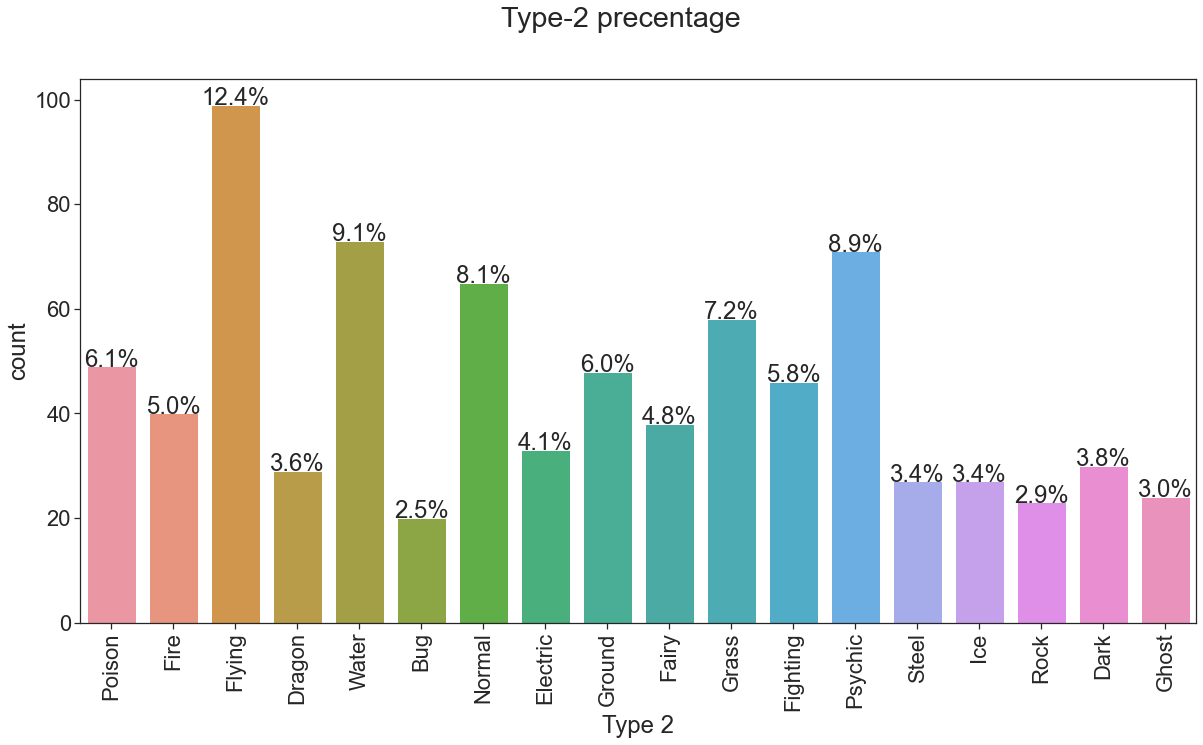

In [11]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('Type-2 precentage')
xticks(rotation=90)
sns.countplot(x ='Type 2', data = pokenon)
for p in ax.patches:
    total = float(len(pokenon["Type 2"]))
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

# 2.2 - Number of Pokemon in each gen

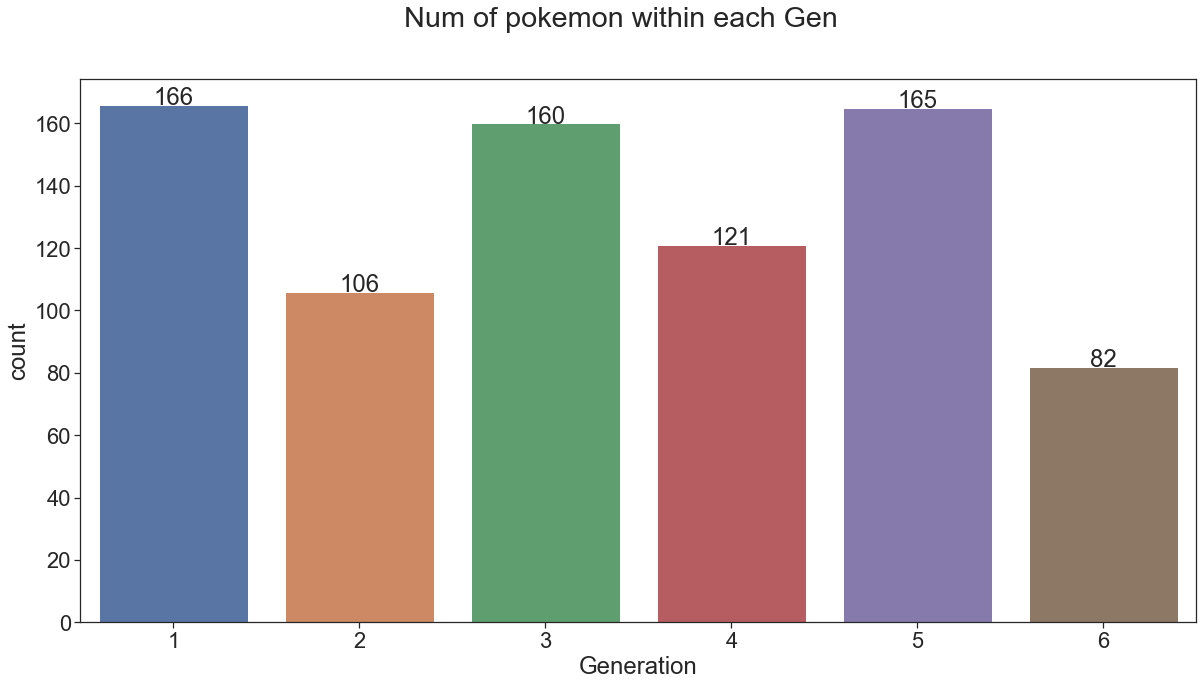

In [12]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('Num of pokemon within each Gen')
box_plot = sns.countplot(data=pokenon,x=pokenon.Generation)
county = (pokenon.groupby('Generation')["Total"].count())
for i in range(1,len(county)+1):
    box_plot.annotate(str(county[i]),xy=(i-1,county[i]),horizontalalignment='center')


In [13]:
# pokemom numeric is only the numeric values of DataFrame
pokenon_numric= pokenon.loc[:,pokenon.dtypes==int64]
pokenon_numric  = pokenon_numric[pokenon_numric.columns[:-2]]

# 2.3.1 - Values Range of each parameter

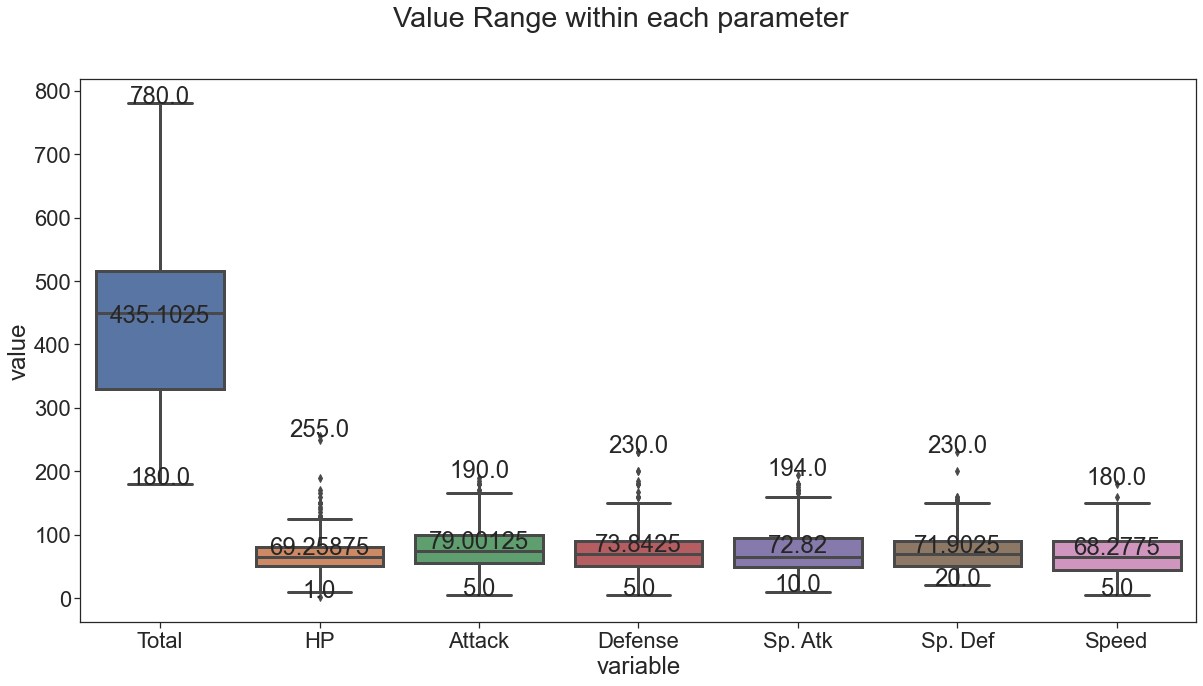

In [14]:
fig, ax = subplots(figsize=(20,10))
box_plot = sns.boxplot(x='variable',y='value',data=pd.melt(pokenon_numric))
fig.suptitle('Value Range within each parameter')

median = list(pokenon_numric.describe().transpose()["mean"])
maxy =list(pokenon_numric.describe().transpose()["max"])
mini =list(pokenon_numric.describe().transpose()["min"])
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 2.3.1 - Values Range of each parameter without Total

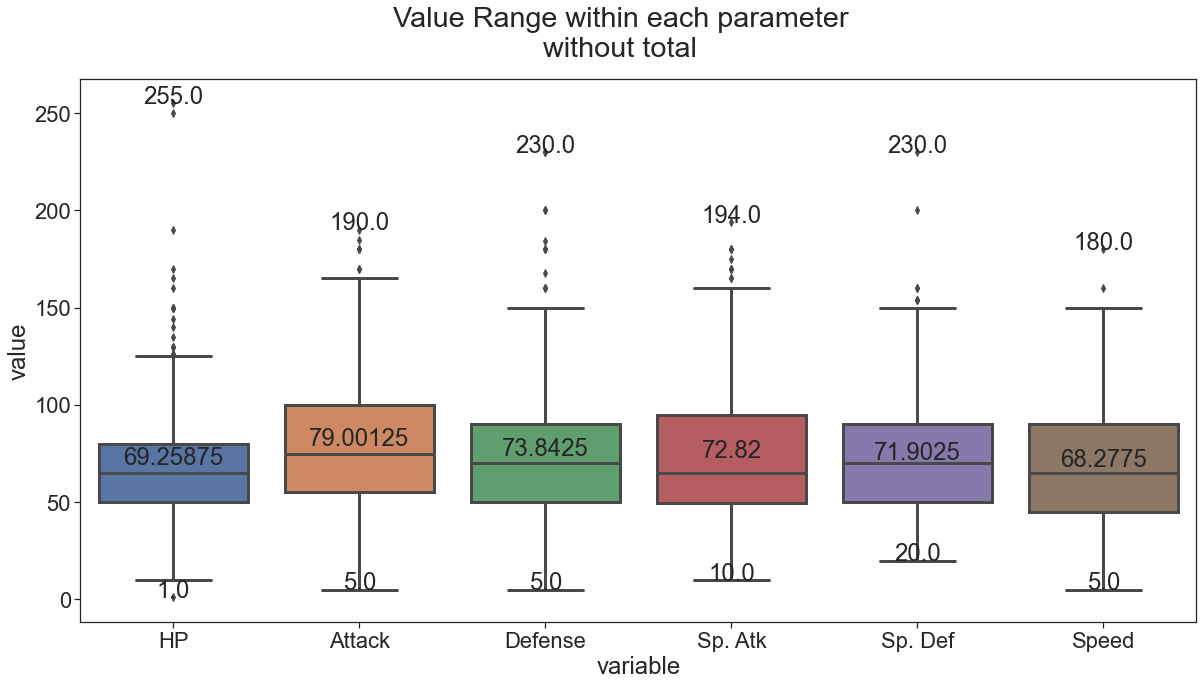

In [15]:
#pokenon_numric  = pokenon_numric[pokenon_numric.columns[1:]]
pokenon_numric.drop("Total",axis=1,inplace=True)
fig, ax = subplots(figsize=(20,10))

box_plot = sns.boxplot(x='variable',y='value',data=pd.melt(pokenon_numric))
fig.suptitle('Value Range within each parameter\nwithout total')

median = list(pokenon_numric.describe().transpose()["mean"])
maxy =list(pokenon_numric.describe().transpose()["max"])
mini =list(pokenon_numric.describe().transpose()["min"])
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 2.3.2 - Total power by Generation

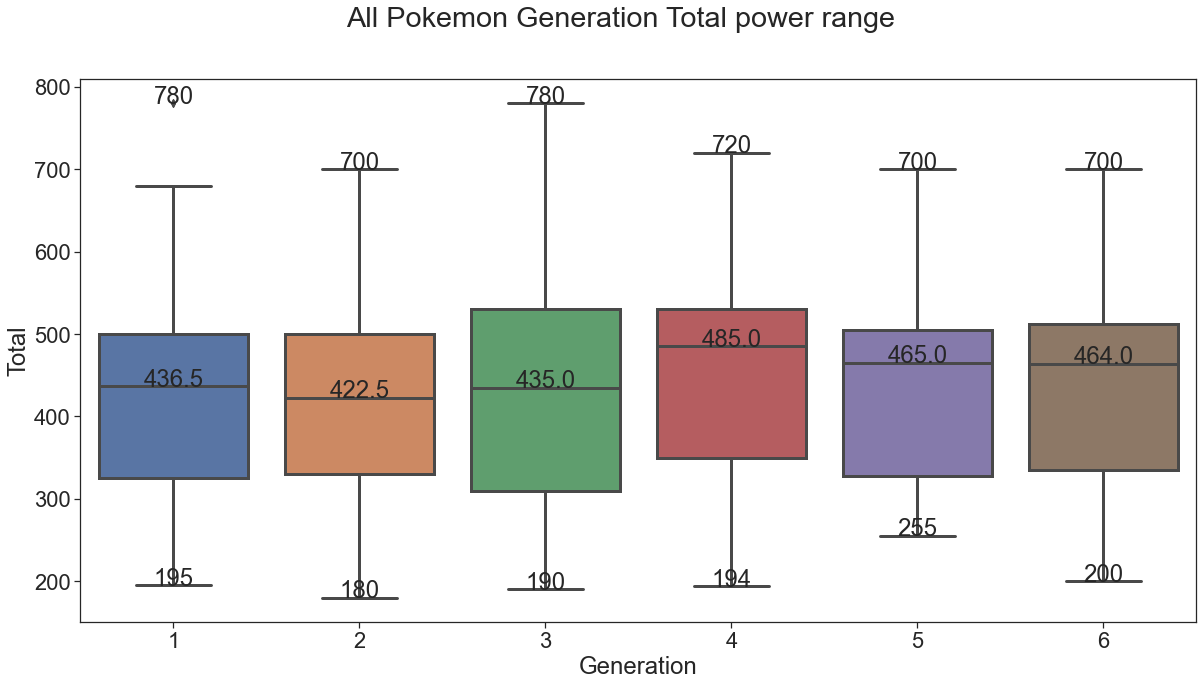

In [16]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('All Pokemon Generation Total power range')
box_plot = sns.boxplot(data=pokenon[pokenon.Legendary!=1],x=pokenon.Generation,y=pokenon.Total)
median = (pokenon.groupby('Generation')["Total"].median())
maxi = pokenon.groupby('Generation')["Total"].max()
mini = pokenon.groupby('Generation')["Total"].min()

for i in range(1,len(median)+1):
    box_plot.annotate(str(median[i]),xy=(i-1,median[i]),horizontalalignment='center')
    box_plot.annotate(str(maxi[i]),xy=(i-1,maxi[i]),horizontalalignment='center')
    box_plot.annotate(str(mini[i]),xy=(i-1,mini[i]),horizontalalignment='center')



# 2.3.3 - Total HP by Generation

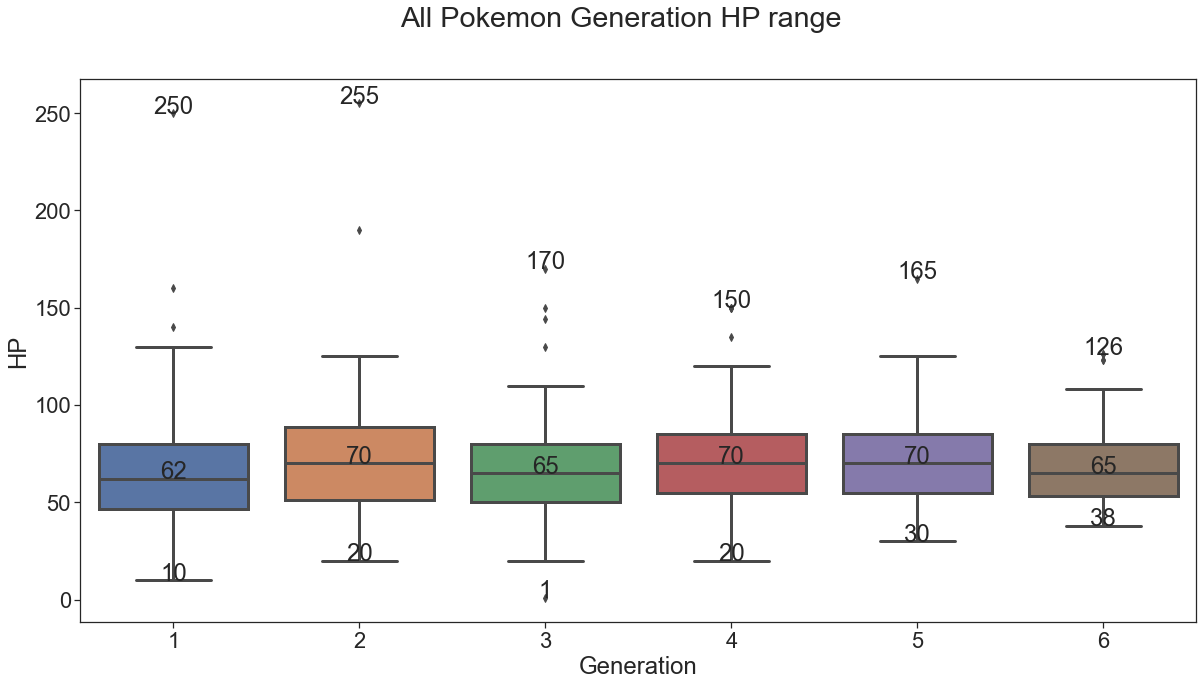

In [17]:
fig, ax = subplots(figsize=(20,10))
box_plot = sns.boxplot(x=pokenon.Generation, y=pokenon.HP)
fig.suptitle('All Pokemon Generation HP range')
median = list(pokenon.groupby("Generation")["HP"].median())
maxy =list(pokenon.groupby("Generation")["HP"].max())
mini = list(pokenon.groupby("Generation")["HP"].min())
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 2.3.4 - Total Attack by Generation

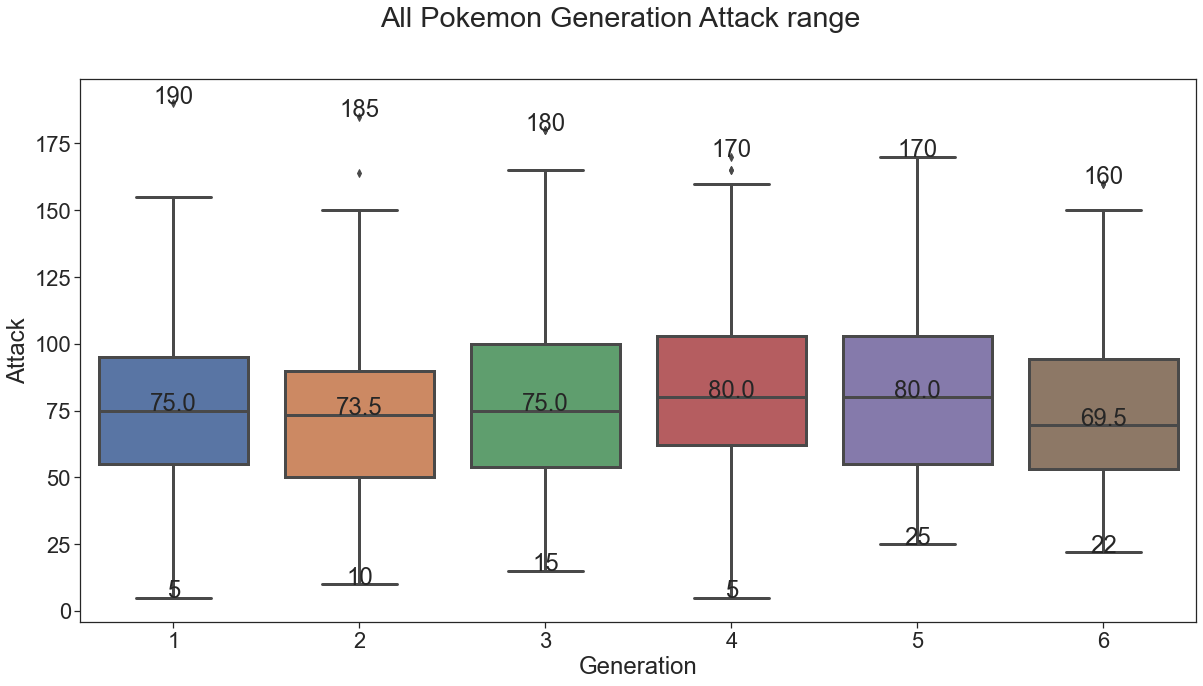

In [18]:
fig, ax = subplots(figsize=(20,10))
box_plot = sns.boxplot(x=pokenon.Generation, y=pokenon.Attack)
fig.suptitle('All Pokemon Generation Attack range')
median = list(pokenon.groupby("Generation")["Attack"].median())
maxy =list(pokenon.groupby("Generation")["Attack"].max())
mini = list(pokenon.groupby("Generation")["Attack"].min())
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 3. Only Lengandry

In [19]:
Legend_pokemon= pokenon.loc[:,(pokenon.dtypes==int64)]
Legend_pokemon= Legend_pokemon[Legend_pokemon.Legendary==1]
Legend_pokemon = Legend_pokemon[Legend_pokemon.columns[:-2]]
Legend_pokemon.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,
Articuno,580,90,85,100,95,125,85
Zapdos,580,90,90,85,125,90,100
Moltres,580,90,100,90,125,85,90
Mewtwo,680,106,110,90,154,90,130
MewtwoMega Mewtwo X,780,106,190,100,154,100,130


# 3.1 - Values Range of each parameter

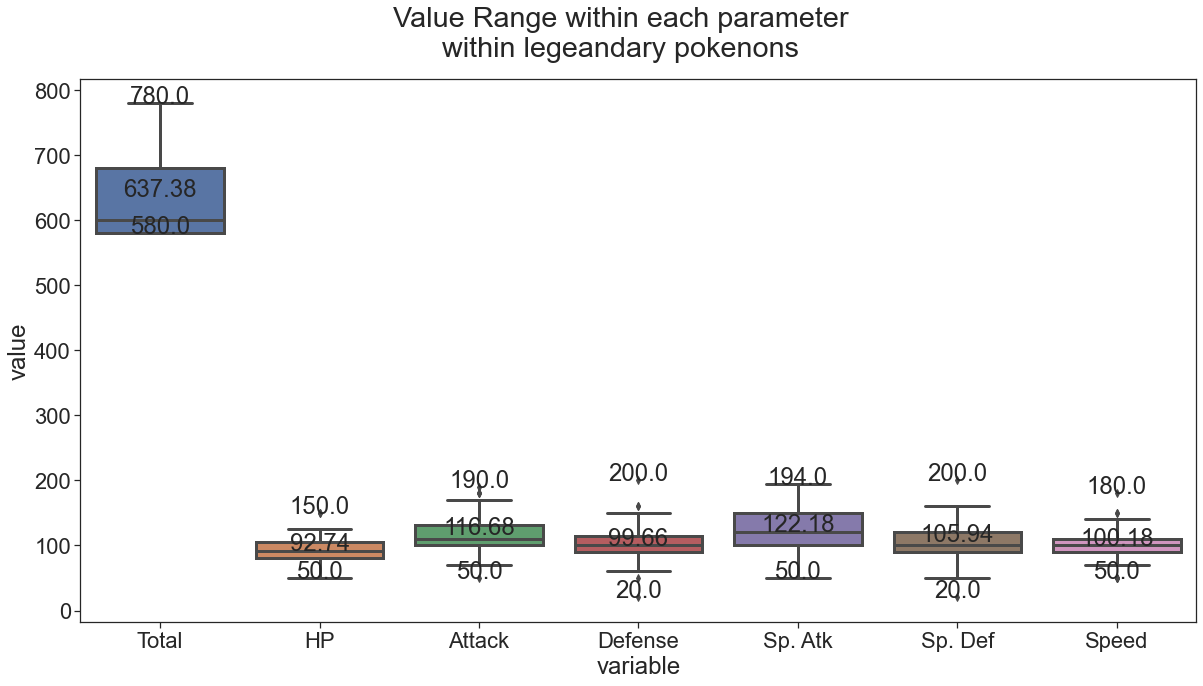

In [20]:
fig, ax = subplots(figsize=(20,10))

box_plot = sns.boxplot(x='variable',y='value',data=pd.melt(Legend_pokemon))
fig.suptitle('Value Range within each parameter\nwithin legeandary pokenons')

median = list(Legend_pokemon.describe().transpose()["mean"])
maxy =list(Legend_pokemon.describe().transpose()["max"])
mini =list(Legend_pokemon.describe().transpose()["min"])
for i in range(0,len(median)):
    box_plot.annotate(str("%.2f" %median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 3.1.2 - Values Range of each parameter without total

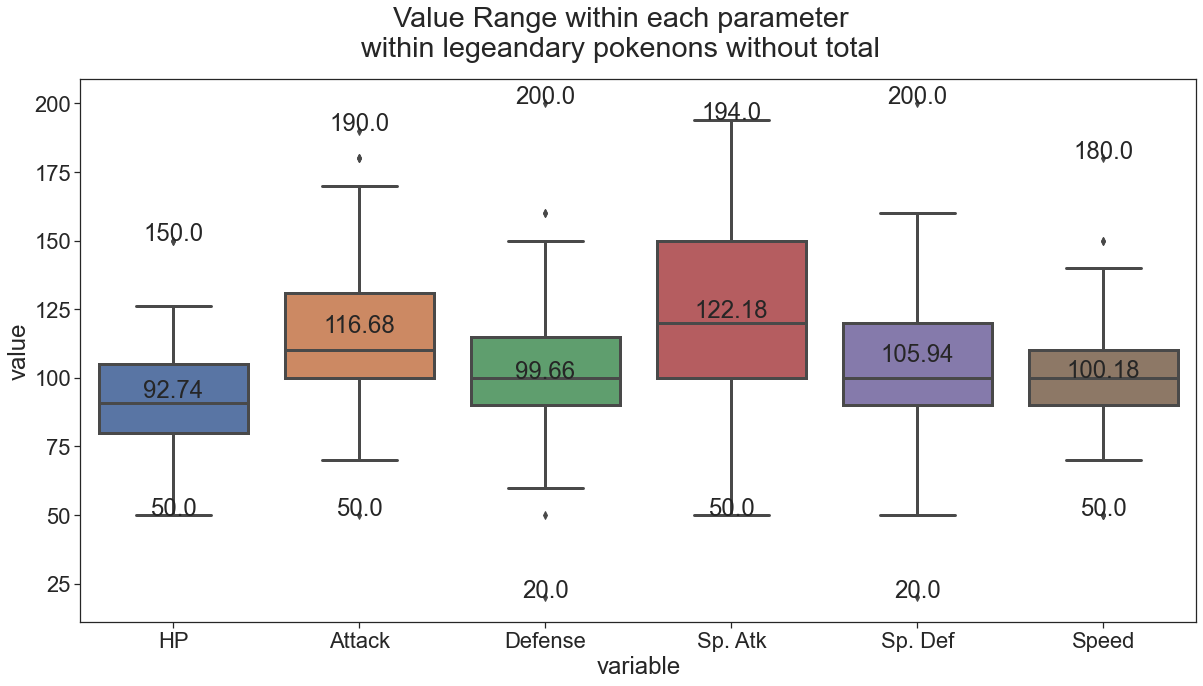

In [21]:
Legend_pokemon = Legend_pokemon[Legend_pokemon.columns[1:]]
fig, ax = subplots(figsize=(20,10))

box_plot = sns.boxplot(x='variable',y='value',data=pd.melt(Legend_pokemon))
fig.suptitle('Value Range within each parameter\nwithin legeandary pokenons without total')

median = list(Legend_pokemon.describe().transpose()["mean"])
maxy =list(Legend_pokemon.describe().transpose()["max"])
mini =list(Legend_pokemon.describe().transpose()["min"])
for i in range(0,len(median)):
    box_plot.annotate(str("%.2f" %median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 3.1.3 - Values range of Total power within legendary

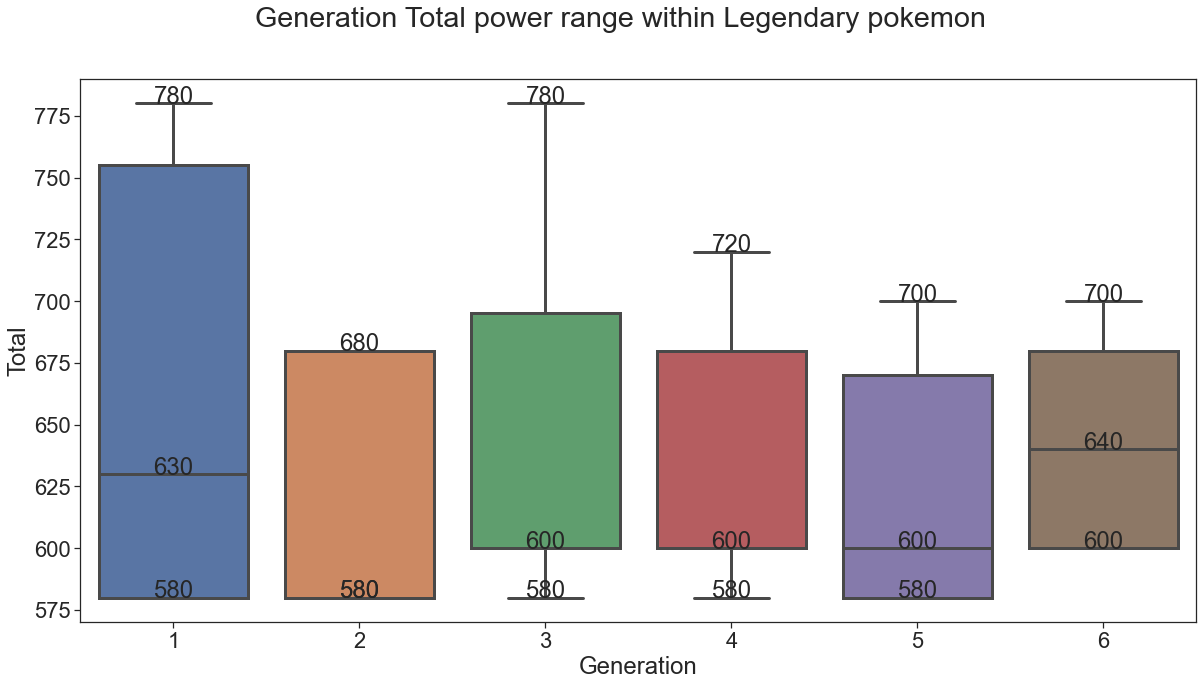

In [22]:
fig, ax = subplots(figsize=(20,10))
temp_arr = pokenon[pokenon.Legendary==True]
median = temp_arr.groupby("Generation")["Total"].median()
maxi = temp_arr.groupby("Generation")["Total"].max()
mini = temp_arr.groupby("Generation")["Total"].min()

fig.suptitle('Generation Total power range within Legendary pokemon')
box_plot = sns.boxplot(data=temp_arr,x=temp_arr.Generation,y=temp_arr.Total)
for i in range(1,len(median)+1):
    box_plot.annotate(str(median[i]),xy=(i-1,median[i]),horizontalalignment='center')
    box_plot.annotate(str(maxi[i]),xy=(i-1,maxi[i]),horizontalalignment='center')
    box_plot.annotate(str(mini[i]),xy=(i-1,mini[i]),horizontalalignment='center')

# 3.1.3 - Values range of HP within legendary

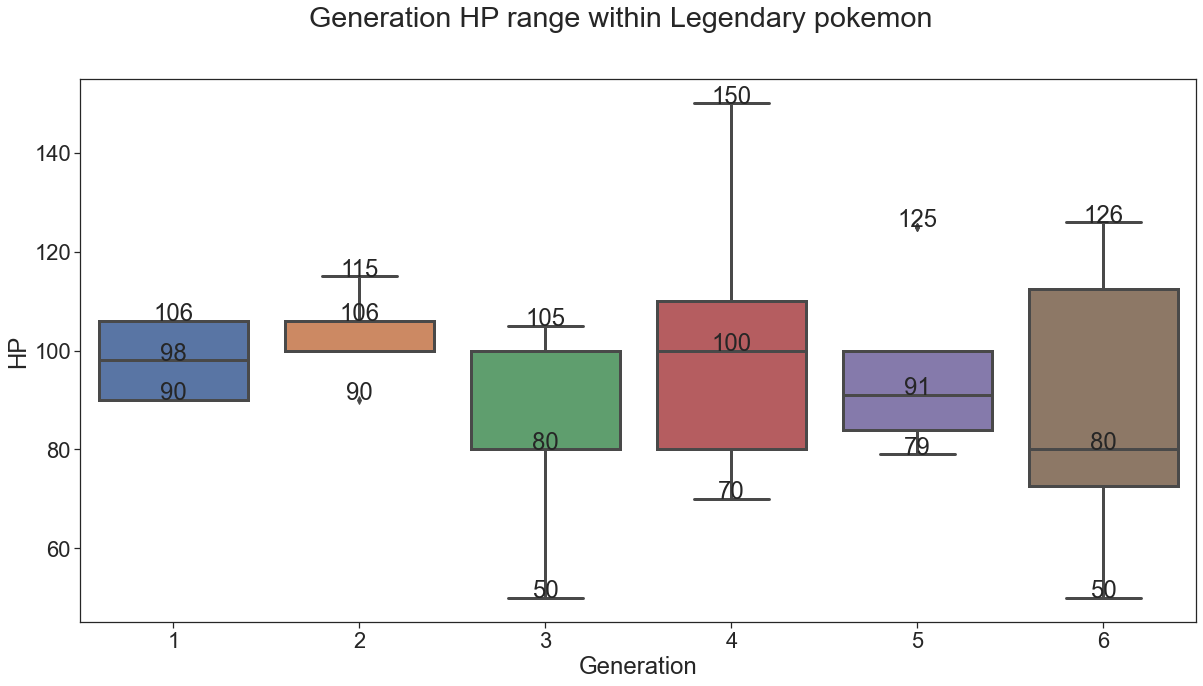

In [23]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('Generation HP range within Legendary pokemon')
Legend_Hp = pokenon[pokenon.Legendary==True]

median = list(Legend_Hp.groupby("Generation")["HP"].median())
maxy =list(Legend_Hp.groupby("Generation")["HP"].max())
mini = list(Legend_Hp.groupby("Generation")["HP"].min())

box_plot = sns.boxplot(data=Legend_Hp,x="Generation",y="HP")
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 3.1.3 - Values range of attack within legendary

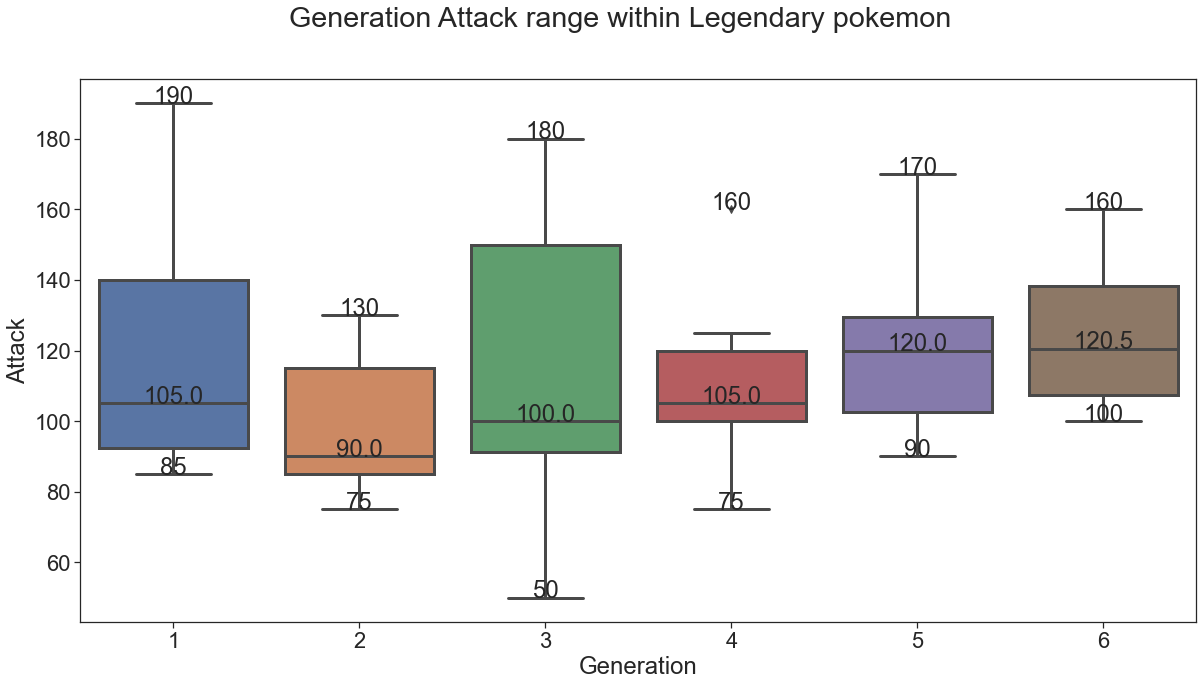

In [24]:
fig, ax = subplots(figsize=(20,10))
fig.suptitle('Generation Attack range within Legendary pokemon')
Legend_Hp = pokenon[pokenon.Legendary==True]

median = list(Legend_Hp.groupby("Generation")["Attack"].median())
maxy =list(Legend_Hp.groupby("Generation")["Attack"].max())
mini = list(Legend_Hp.groupby("Generation")["Attack"].min())

box_plot = sns.boxplot(data=Legend_Hp,x="Generation",y="Attack")
for i in range(0,len(median)):
    box_plot.annotate(str(median[i]),xy=(i,median[i]),horizontalalignment='center',)
    box_plot.annotate(str(maxy[i]),xy=(i,maxy[i]),horizontalalignment='center',)
    box_plot.annotate(str(mini[i]),xy=(i,mini[i]),horizontalalignment='center',)

# 3.2 - precentage

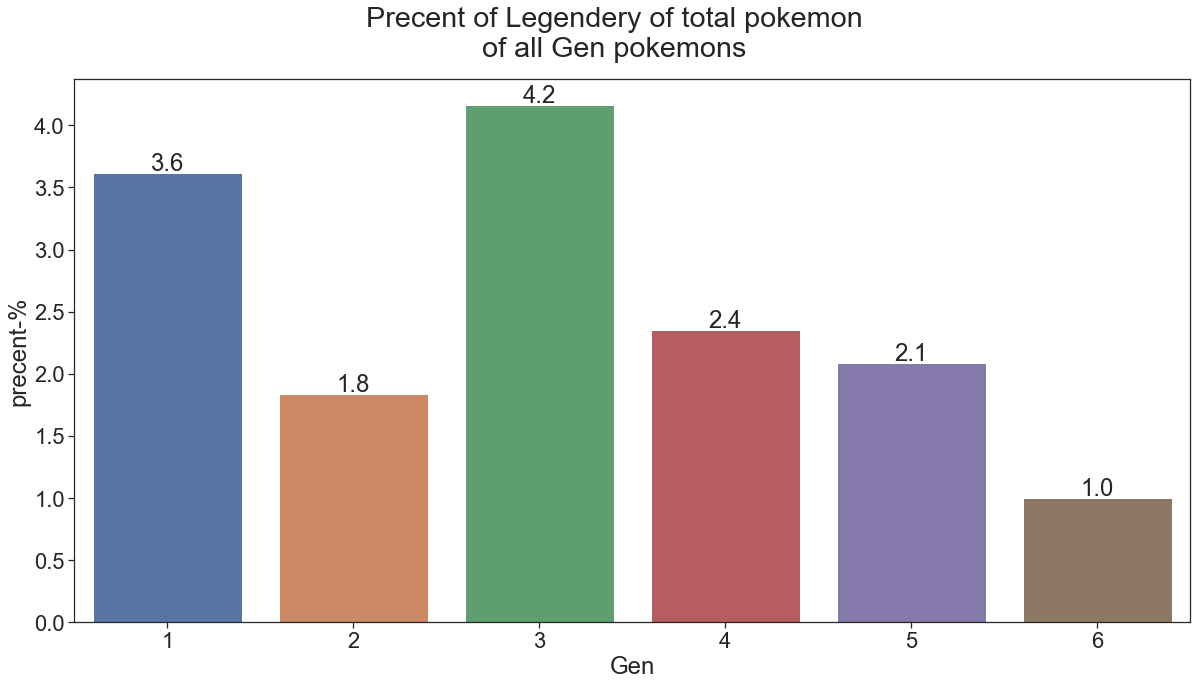

In [25]:
prec = [(len(pokenon[(pokenon.Generation==gen)&(pokenon.Legendary==True)])/ len(pokenon[(pokenon.Generation<=gen)]))*100
       for gen in range(1,7)]
val_dict = dict(enumerate(prec,1))
val_df = pd.DataFrame(val_dict,index=["precent-%"]).transpose()
val_df["Gen"] = [i for i in range(1,7)]

fig, ax = subplots(figsize=(20,10))
fig.suptitle('Precent of Legendery of total pokemon\nof all Gen pokemons')
bar_fig = sns.barplot(data=val_df,x=val_df.Gen,y=val_df["precent-%"])

for p in bar_fig.patches:
    bar_fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


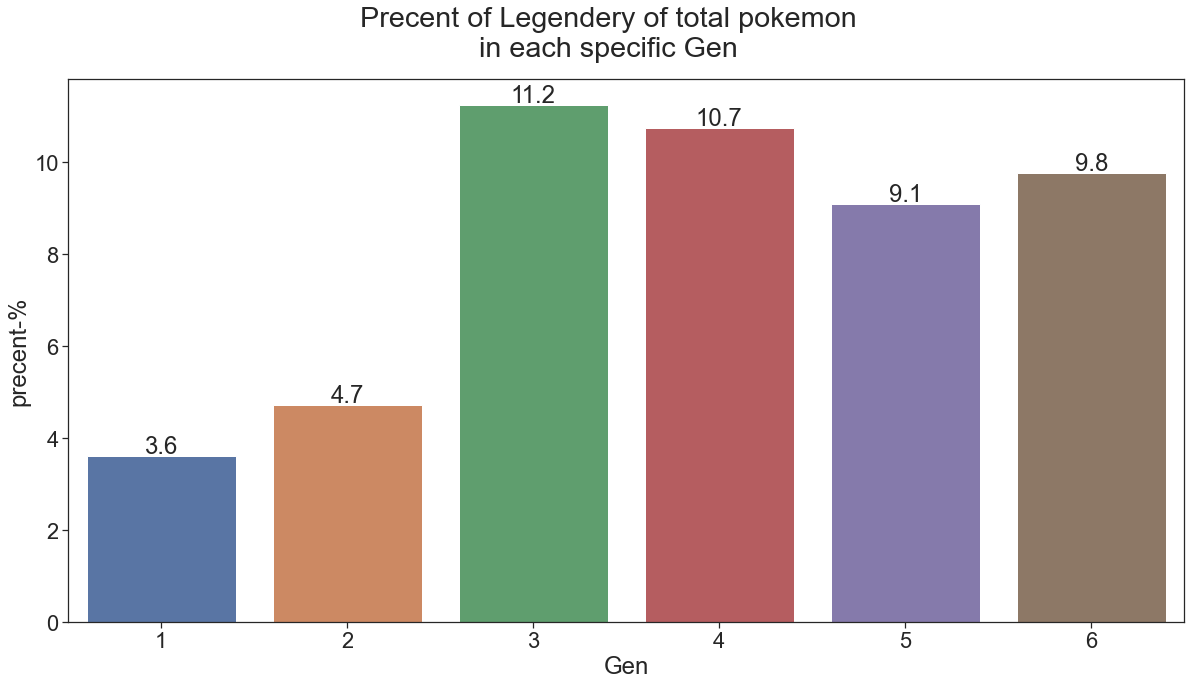

In [26]:
prec = [(len(pokenon[(pokenon.Generation==gen)&(pokenon.Legendary==True)])/ len(pokenon[(pokenon.Generation==gen)]))*100
       for gen in range(1,7)]
val_dict = dict(enumerate(prec,1))
val_df = pd.DataFrame(val_dict,index=["precent-%"]).transpose()
val_df["Gen"] = [i for i in range(1,7)]

fig, ax = subplots(figsize=(20,10))
fig.suptitle('Precent of Legendery of total pokemon\nin each specific Gen')
bar_fig = sns.barplot(data=val_df,x=val_df.Gen,y=val_df["precent-%"])

for p in bar_fig.patches:
    bar_fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


# 4. General view of all factors if Legenary are stronger

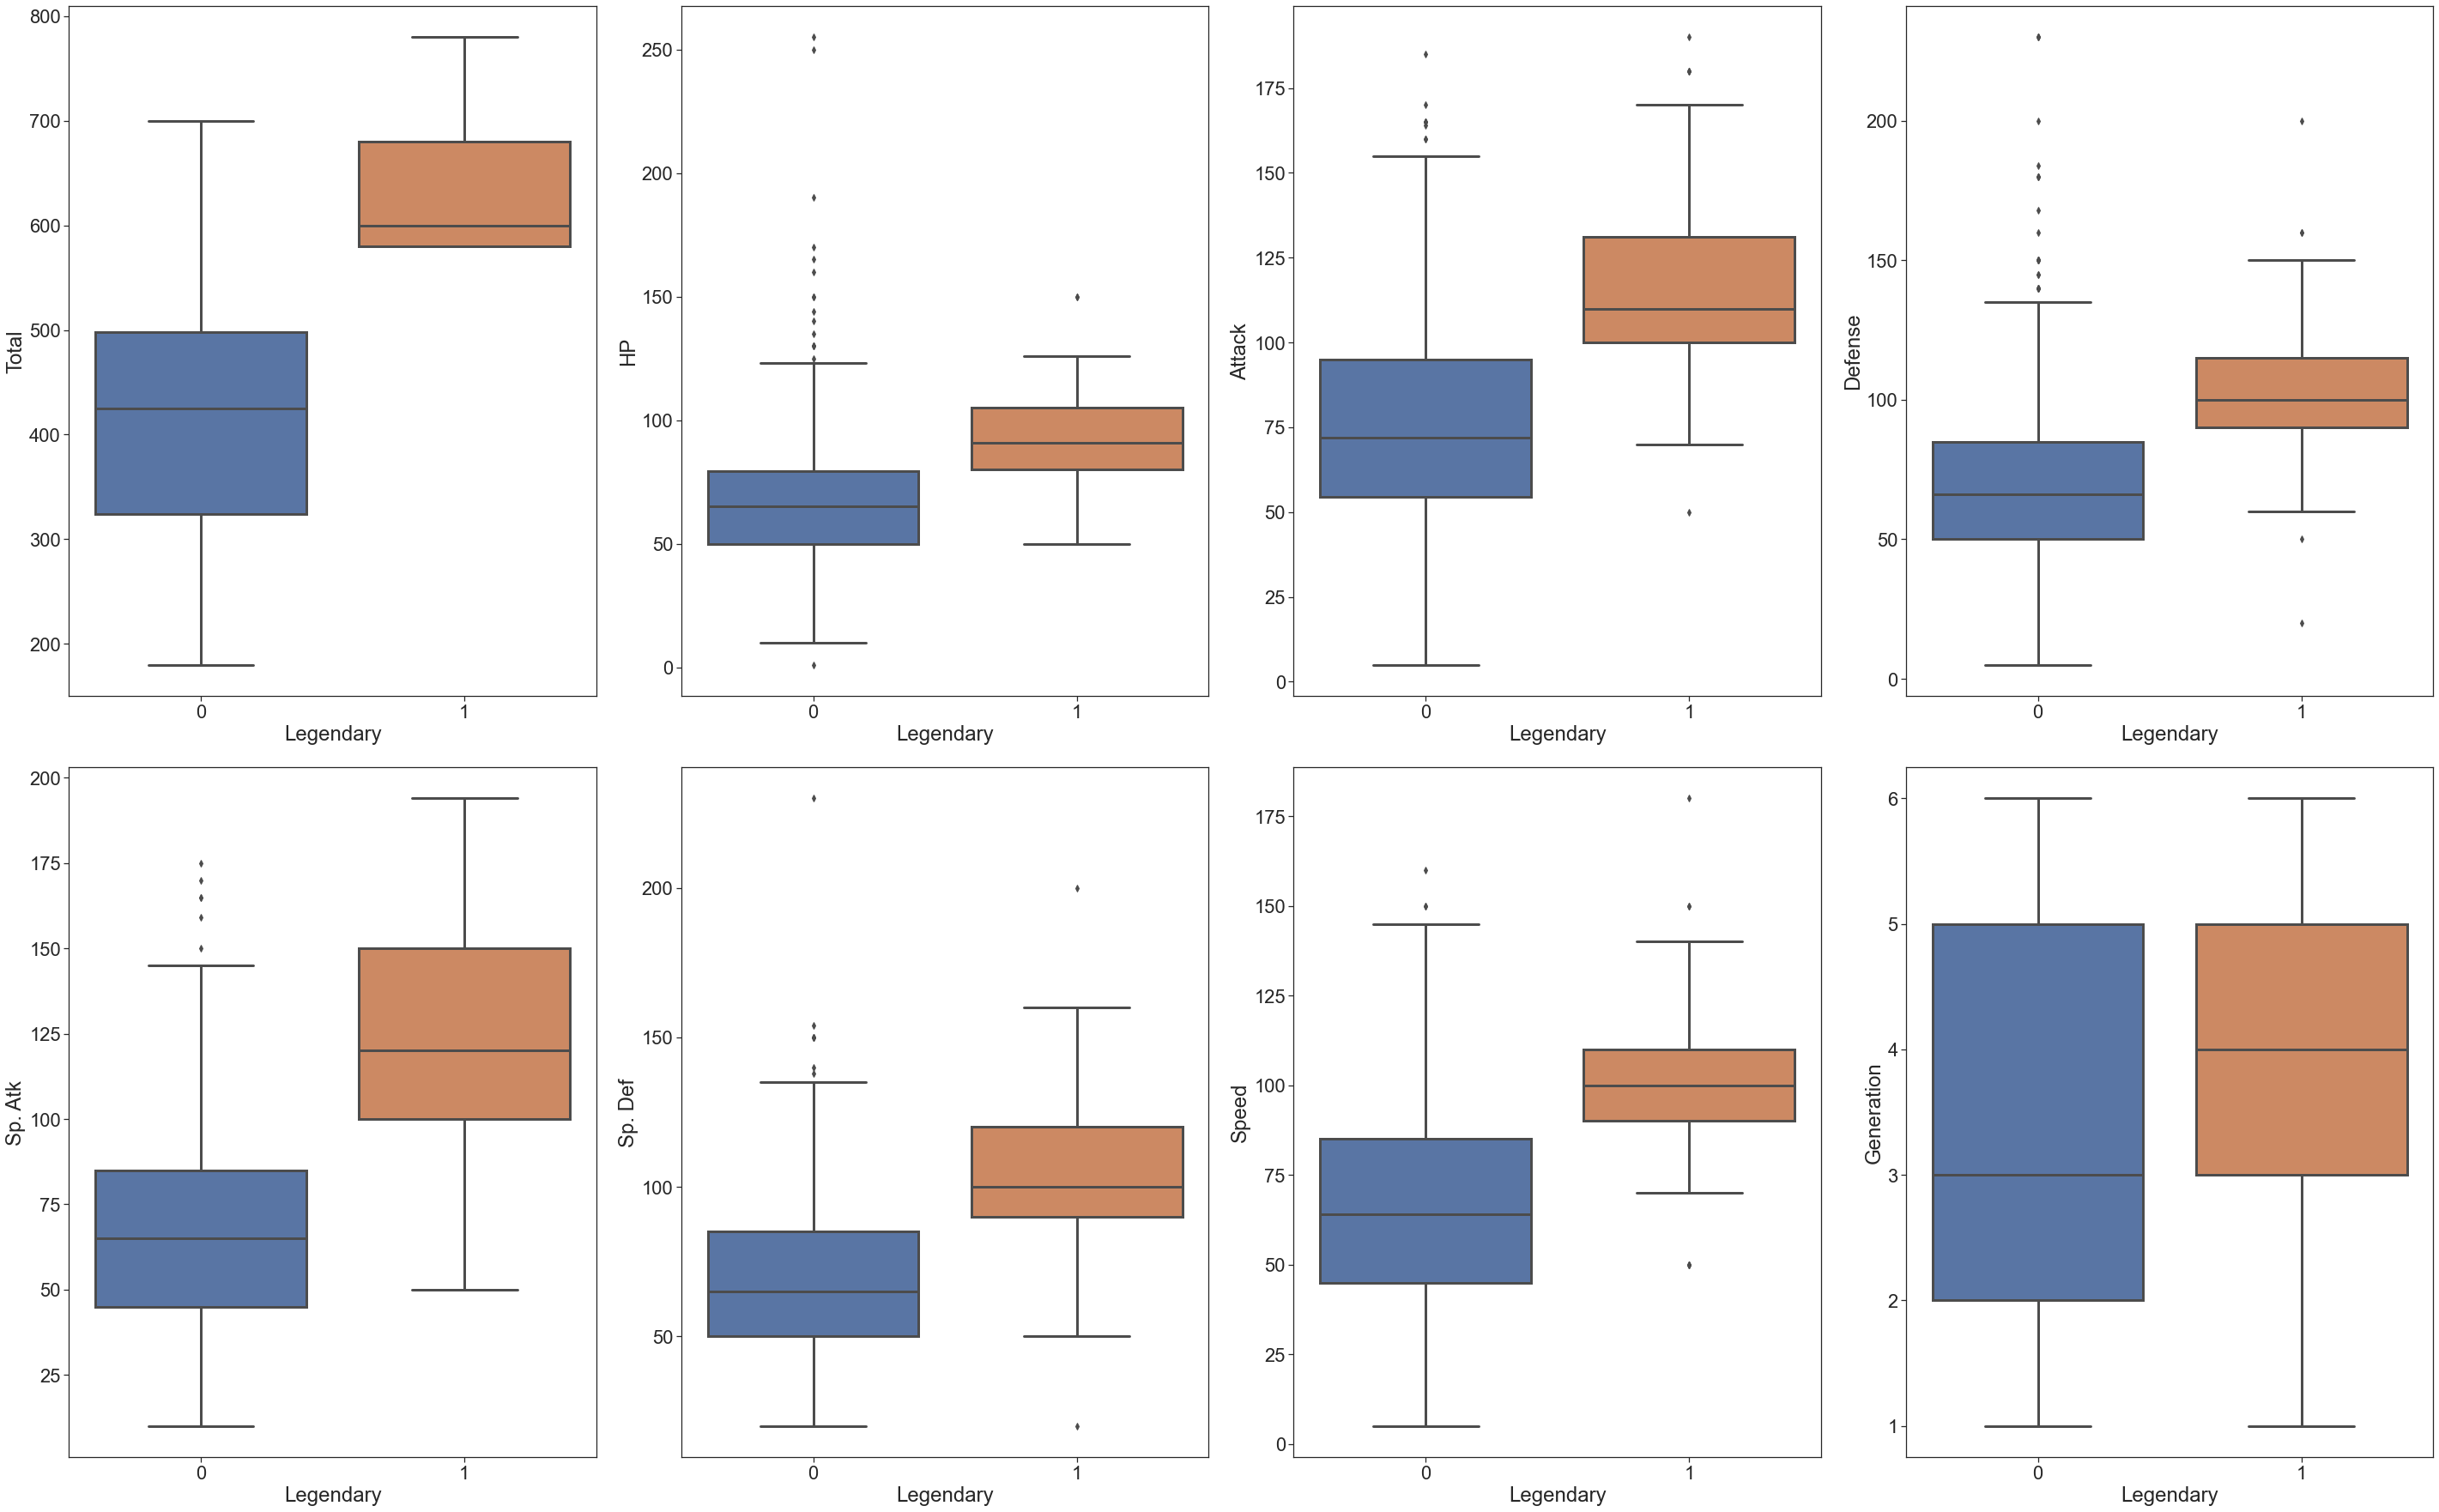

In [27]:
cols = pokenon.columns[2:-1]
n_cols= 4 
fig, axs = subplots(2,4, figsize=(40,25))
for i, col in enumerate(cols):
    #sns.set(font_scale = 5)
    #axs[r,c].title.set_text(f"{col}")
    r = i//n_cols
    c = i%n_cols
    ax = axs[r,c]
    sns.boxplot(data=pokenon,x="Legendary",y=col,ax=ax)
fig.tight_layout()

<AxesSubplot:>

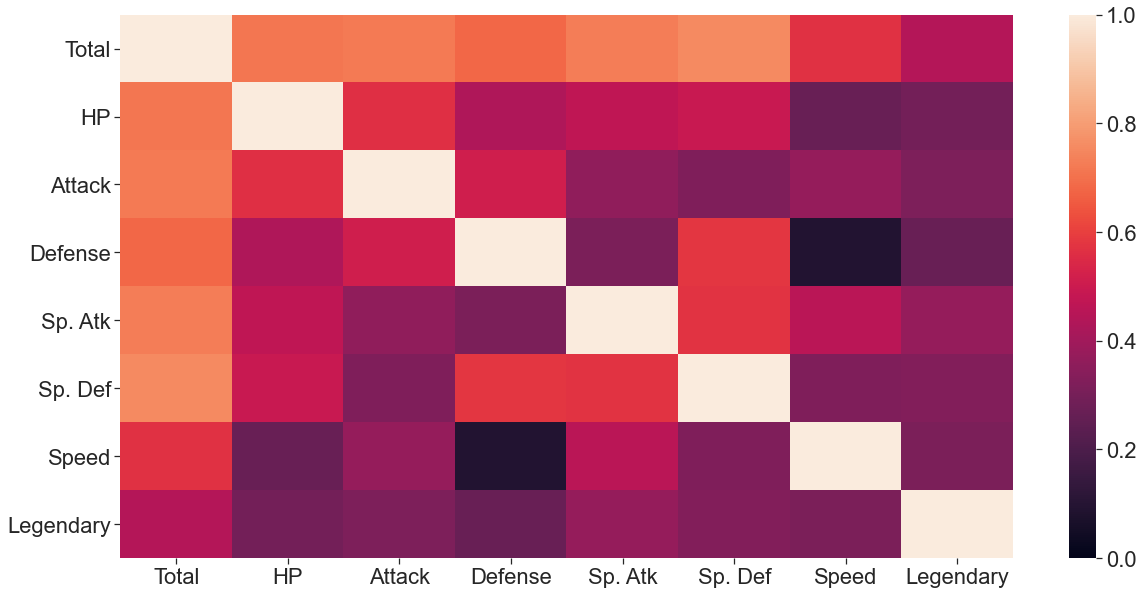

In [28]:
pokemon = pokenon.copy()
fig, ax = subplots(figsize=(20,10))
pokemon.drop(["Generation"],axis=1,inplace=True)
sns.heatmap(pokemon.corr('spearman'),vmin=0,vmax=1)


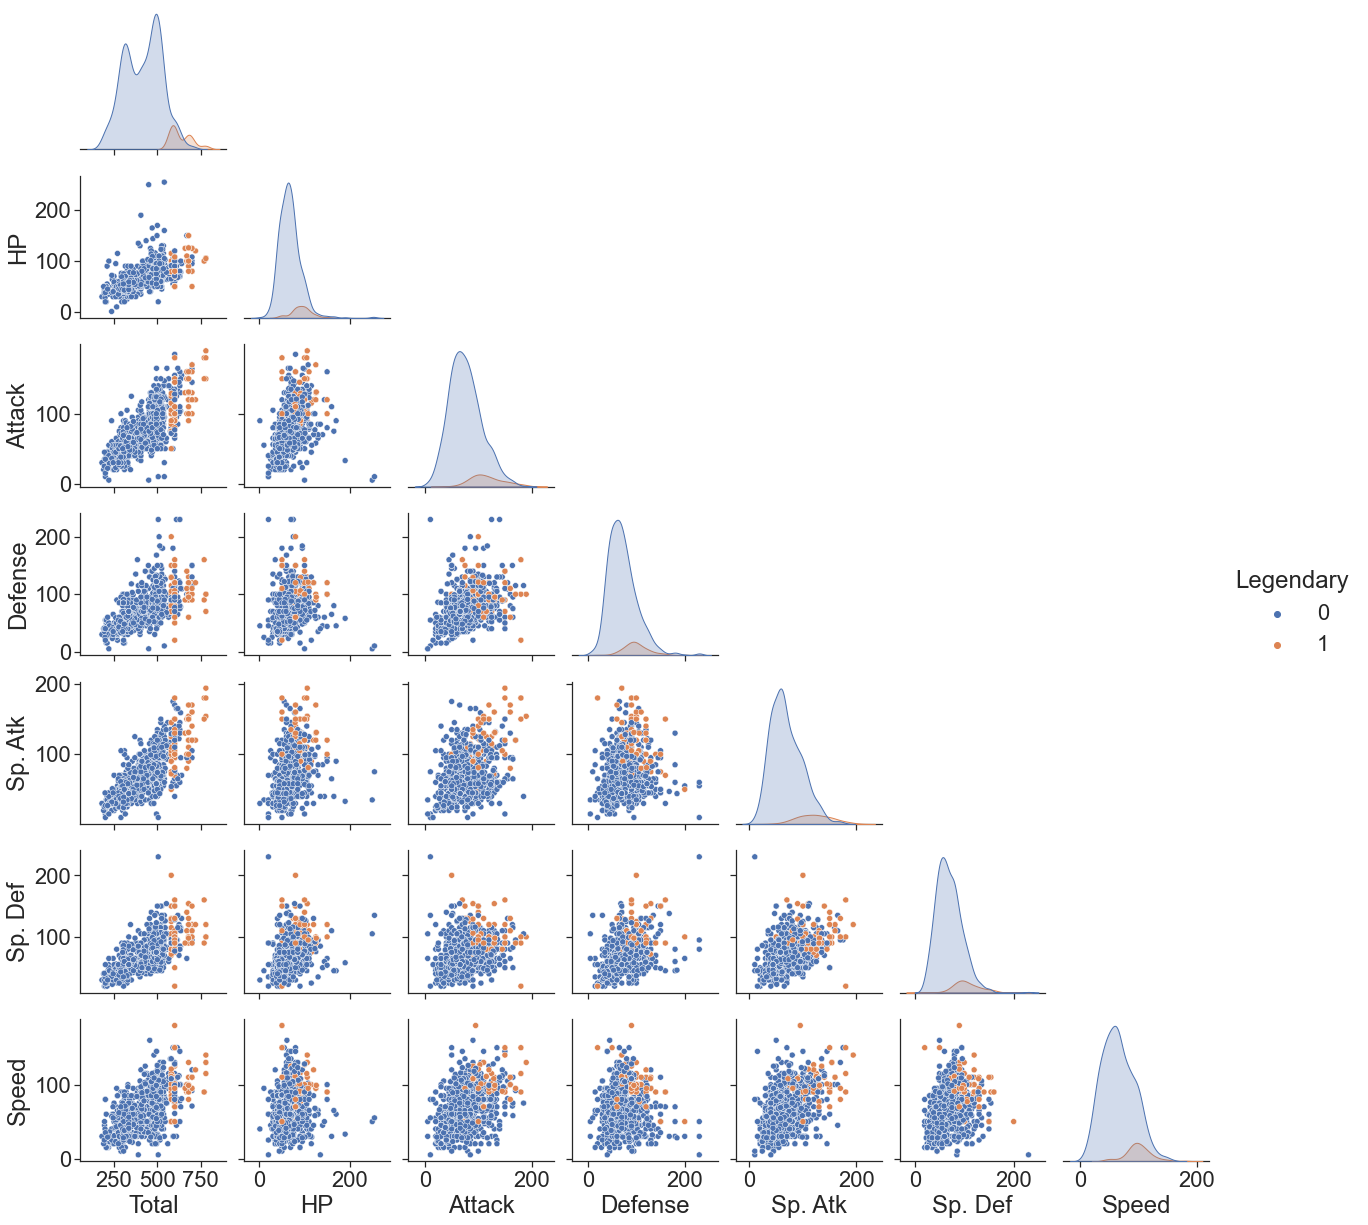

In [29]:
sns.pairplot(pokemon,hue="Legendary",corner=True)

Text(0.5, 1.0, 'KDE Plot for Total artibute')

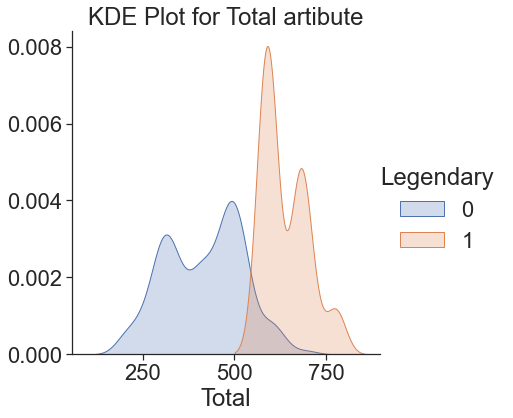

In [30]:
sns.FacetGrid(pokenon, hue="Legendary", height=6,).map(sns.kdeplot, "Total",shade=True).add_legend()
plt.title('KDE Plot for Total artibute')


## conclusion 
- there is not connection between type-1 and type-2.
- <b>Water</b> type is the most common in type-1, and <b>flying</b> is the less common
- <b>Flyin</b> type is them most common in type-2 and <b>bug</b> is the less common 
- <b>Gen1</b> has the most pokemons and <b>Gen-6</b> has the least pokemon 
but the power the Total power of Normal and Legendary of <b>Gen-6</b> is higher of <b>Gen-1</b> 
- It is possible to see small behevor of decreae of total power betwen the <b>Gen-1</b> and furthure Gens
- There is a major incrase of Legendery pokemon between <b>Gen-1 & Gen-2</b> and </b> <b>Gen-3</b>
and afterward the number of Legenderies deacrase a bit, but stay quite the same 
- legendary pokemon from <b>Gen-1</b> has higher Total power then <b>Gen-6</b> but lower HP
- Last Gen has higher precent of Legenderies in compare to the total number of pokeon which were
reveled in the Gen - today kids are spoiled when i i was young we had mewtwo and lugia (maybe Hoho)
- Most Legendary pokemon are stronger then normal ones
- There is <b>NO</b> strong correlction between any variables 



# i'll try to predict if the pokemon is legendery by status without Total

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [32]:
pokemon = pokenon.copy()
pokemon = pokemon[pokemon.columns[2:]] # without total because it is sum of all factors - maybe late only by power

# Function that considerate Gen num

In [33]:
def IsLegendGen(df,gen=6):
    df = df[df.Generation<=gen]
    ## Creating learing X , and predicting Y
    X = df.drop("Legendary",axis=1)
    y = df["Legendary"]
    # splitting the Data to train and test
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
    # use Standart scaller because not all data use same value range - such as gen and power
    scaller = StandardScaler()
    X_train = scaller.fit_transform(X_train)
    X_test = scaller.fit_transform(X_test)
    ### Creat the Logistic reg model
    classifier = LogisticRegression(random_state = 42) # life univerce and anythinh will be the same
    classifier.fit(X_train, y_train)
    # predition of them model
    y_pred  = classifier.predict(X_test)
    ###
    conf_mat = confusion_matrix(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    model_summary = sm.OLS(y_pred,y_test)
    Pval = (model_summary.fit().f_pvalue)
    ####
    ####
    return(conf_mat,Accuracy,class_report,len(df),Pval)


# Function that doesn't considerate Gen num

In [34]:
def IsLegend(df,gen=6):
    df = df[df.Generation<=gen]
    df = df.drop("Generation",axis=1)
    ## Creating learing X , and predicting Y
    X = df.drop("Legendary",axis=1)
    y = df["Legendary"]
    # splitting the Data to train and test
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
    # use Standart scaller because not all data use same value range - such as gen and power
    scaller = StandardScaler()
    X_train = scaller.fit_transform(X_train)
    X_test = scaller.fit_transform(X_test)
    ### Creat the Logistic reg model
    classifier = LogisticRegression(random_state = 42) # life univerce and anythinh will be the same
    classifier.fit(X_train, y_train)
    # predition of them model
    y_pred  = classifier.predict(X_test)
    ###
    conf_mat = confusion_matrix(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    model_summary = sm.OLS(y_pred,y_test)
    Pval = (model_summary.fit().f_pvalue)
    ####
    ####
    return(conf_mat,Accuracy,class_report,len(df),Pval)


In [35]:
#for gene_num in sorted(pokemon.Generation.unique(),reverse=False):
gene_num = 1
while True:
    conf_mat_gen,Accuracy_gen,class_report_gen,df_length_gen,p_value_gen = IsLegendGen(pokemon,gen=gene_num)#with gen
    
    conf_mat,Accuracy,class_report,df_length,p_value = IsLegend(pokemon,gen=gene_num)#without gen
        
    print(f"\nCheck the model stats when trying to predict if the pokenon is legendery in genetation {gene_num} \ninformation when the DataFrmae length is {df_length_gen}\n")
    print("When the model consider the Genetation as factor:")
    print(f"\t1a.The Acuracy of the model is: {Accuracy_gen}")
    print("When the model doesn't consider the Genetation as factor:")
    print(f"\t1b.The Acuracy of the model is: {Accuracy}")
    print("Comparing the model accuracy")
    print(f"\t1c.Check if the model accuracy is the same: {Accuracy_gen==Accuracy}")
    
    print("\nWhen the model consider the Generation factor The conf matrix is:")
    print(f"\t2.1a.TruePoss + TrueNeg = {conf_mat_gen[0][0]}+{conf_mat_gen[1][1]}")
    print(f"\t2.1b.FalsePos + FalseNeg = {conf_mat_gen[0][1]}+{conf_mat_gen[1][0]}")
    print("When the model doesn't consider the Genetation as factor:")
    print(f"\t2.2a.TruePoss + TrueNeg = {conf_mat[0][0]}+{conf_mat[1][1]}")
    print(f"\t2.2b.FalsePos + FalseNeg = {conf_mat[0][1]}+{conf_mat[1][0]}")
    
    print("\nWhen the model consider the Generation Pvalue is:")
    print(f"\t3.1.The P-Value of the prediction is: {p_value_gen}")
    print("When the doesn't model consider the Generation Pvalue is:")
    print(f"\t3.2 The P-Value of the prediction is: {p_value}")
    print("Comparing the model P-Value")
    print(f"\t3.3.Check if the model accuracy is the same: {p_value_gen==p_value}")
    
    print("\nWhen the model consider the Generation class report is:")
    print(class_report_gen)
    print("When the model doesn't consider the Generation class report is:")
    print(class_report)
    
    gene_num+=1

    if gene_num>6:
        break


Check the model stats when trying to predict if the pokenon is legendery in genetation 1 
information when the DataFrmae length is 166

When the model consider the Genetation as factor:
	1a.The Acuracy of the model is: 0.9818181818181818
When the model doesn't consider the Genetation as factor:
	1b.The Acuracy of the model is: 0.9818181818181818
Comparing the model accuracy
	1c.Check if the model accuracy is the same: True

When the model consider the Generation factor The conf matrix is:
	2.1a.TruePoss + TrueNeg = 53+1
	2.1b.FalsePos + FalseNeg = 0+1
When the model doesn't consider the Genetation as factor:
	2.2a.TruePoss + TrueNeg = 53+1
	2.2b.FalsePos + FalseNeg = 0+1

When the model consider the Generation Pvalue is:
	3.1.The P-Value of the prediction is: 1.1194122547055289e-09
When the doesn't model consider the Generation Pvalue is:
	3.2 The P-Value of the prediction is: 1.1194122547055289e-09
Comparing the model P-Value
	3.3.Check if the model accuracy is the same: True

When t

# Cluster 

In [36]:
pokemon = pd.read_csv("Pokemon.csv")
pokemon["Type 2"].fillna(pokemon["Type 1"],inplace=True)
num_null = pokemon.isnull().sum()
print(f"The number of null values are: {num_null.sum()}")
# for me it enough to use 1 Type and fill the name as Index
#pokemon.drop(["#","Type 2","Type 1","Total","Generation","Legendary"],axis=1,inplace=True)

pokemon.drop(["#","Type 2","Type 1","Total"],axis=1,inplace=True)
pokemon["Legendary"] = pokemon["Legendary"].map({False:0,True:1})

pokemon.set_index("Name",inplace=True)

The number of null values are: 0


In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [38]:
model = KMeans(max_iter=1000, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

In [39]:
features = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
#features = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed',"Legendary"]

X = pokemon[features].values

# Scaling the feautres

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)

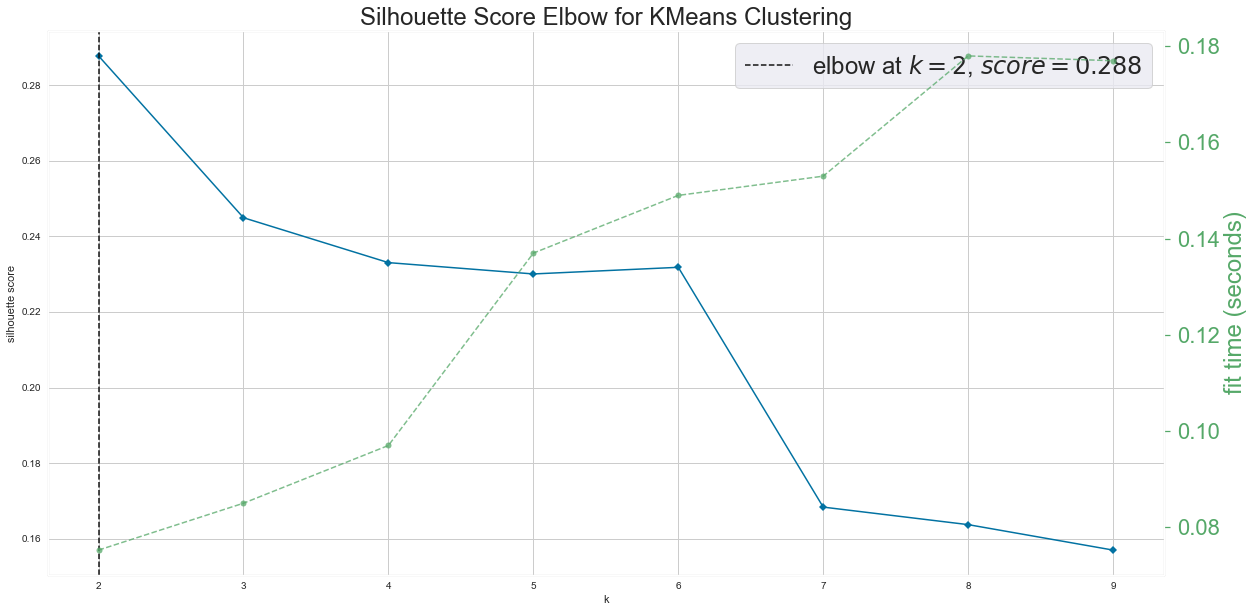

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
fig, ax = subplots(figsize=(20,10))
sns.set(font_scale = 2)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

# Our silhouette_score point out that K=3 might be good
# but i'm trying to split to legendaries and not
# So the number of cluster will be K=2

In [43]:
model = KMeans(n_clusters=2,max_iter=1000,random_state=42)

In [44]:
pokemon["Kmenas_Group"] = model.fit_predict(X)

In [45]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = features
cluster_center['total'] = cluster_center.sum(axis=1)

cluster_center['ordered_label'] = cluster_center.total.rank().astype(int)
cluster_center.sort_values(by='ordered_label').set_index('ordered_label')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total
ordered_label,,,,,,,
1,54.920000,58.037333,55.482667,52.442667,53.432,54.074667,328.389333
2,81.910588,97.498824,90.042353,90.800000,88.200,80.809412,529.261176


In [46]:
relabel = cluster_center.ordered_label.to_dict()
pokemon.Kmenas_Group = pokemon.Kmenas_Group.map(lambda x: relabel[x])

In [47]:
pokemon.Kmenas_Group.value_counts()

2    425
1    375
Name: Kmenas_Group, dtype: int64

## i can assume the clustering divided the pokemon by their total stat 
# let see if the model can predict if the pokemon is legendary

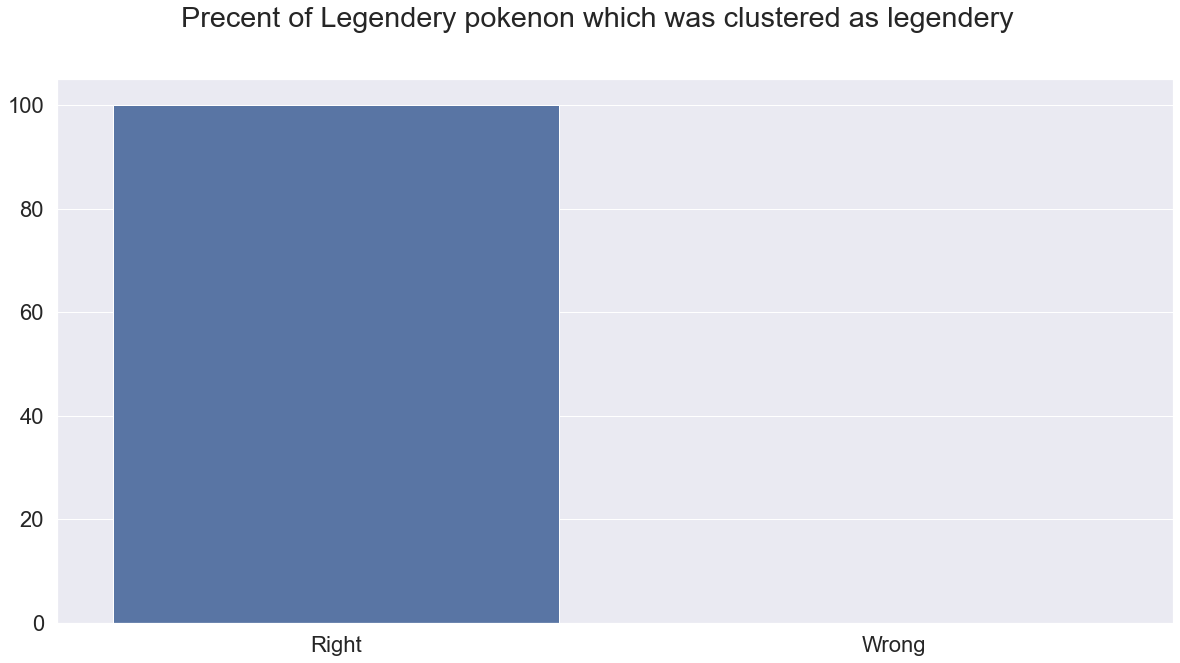

In [48]:
# legandery results
legend_num = len(pokemon[pokemon.Legendary==1]["Kmenas_Group"].values)
Val_True,Val_False = 0,0
for val in pokemon[pokemon.Legendary==1]["Kmenas_Group"].values:
    if val == 2:
        Val_True+=1
    else:
        Val_False+=1
Val_True = (Val_True/legend_num)*100
if Val_False > 0:
    Val_False = (Val_False/legend_num)*100

Legendry_df  = pd.DataFrame({"Right":Val_True,"Wrong":Val_False},index=["Result"])

fig, ax = subplots(figsize=(20,10))
fig.suptitle('Precent of Legendery pokenon which was clustered as legendery')
bar_fig = sns.barplot(data=Legendry_df)

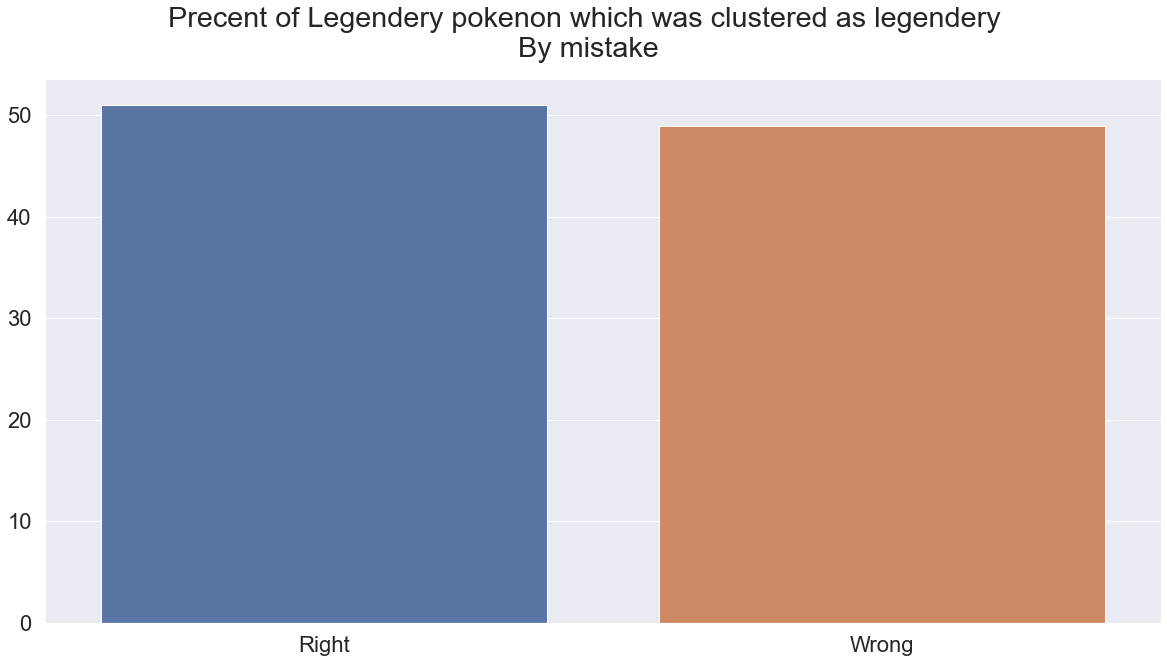

In [49]:
#Not legandery results
legend_num = len(pokemon[pokemon.Legendary==0]["Kmenas_Group"].values)
Val_True,Val_False = 0,0
for val in pokemon[pokemon.Legendary==0]["Kmenas_Group"].values:
    if val == 1:
        Val_True+=1
    else:
        Val_False+=1
Val_True = (Val_True/legend_num)*100
if Val_False > 0:
    Val_False = (Val_False/legend_num)*100

Legendry_df  = pd.DataFrame({"Right":Val_True,"Wrong":Val_False},index=["Result"])

fig, ax = subplots(figsize=(20,10))
fig.suptitle('Precent of Legendery pokenon which was clustered as legendery\n By mistake')
bar_fig = sns.barplot(data=Legendry_df)

#  The model can predict all of the legendries but 
# Also predicting the non legendaries as ones if they are strong enough

# Let see if there is a conncetion within each Gen

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pokemon.loc[:,["Generation","Legendary","Kmenas_Group"]]
df["Preiction"] = df["Kmenas_Group"].map({1:0,2:1})
df["Precent"] = df.Legendary==df.Preiction

In [52]:
df_temp = [df[(df.Generation==i)] for i in range(1,7)]

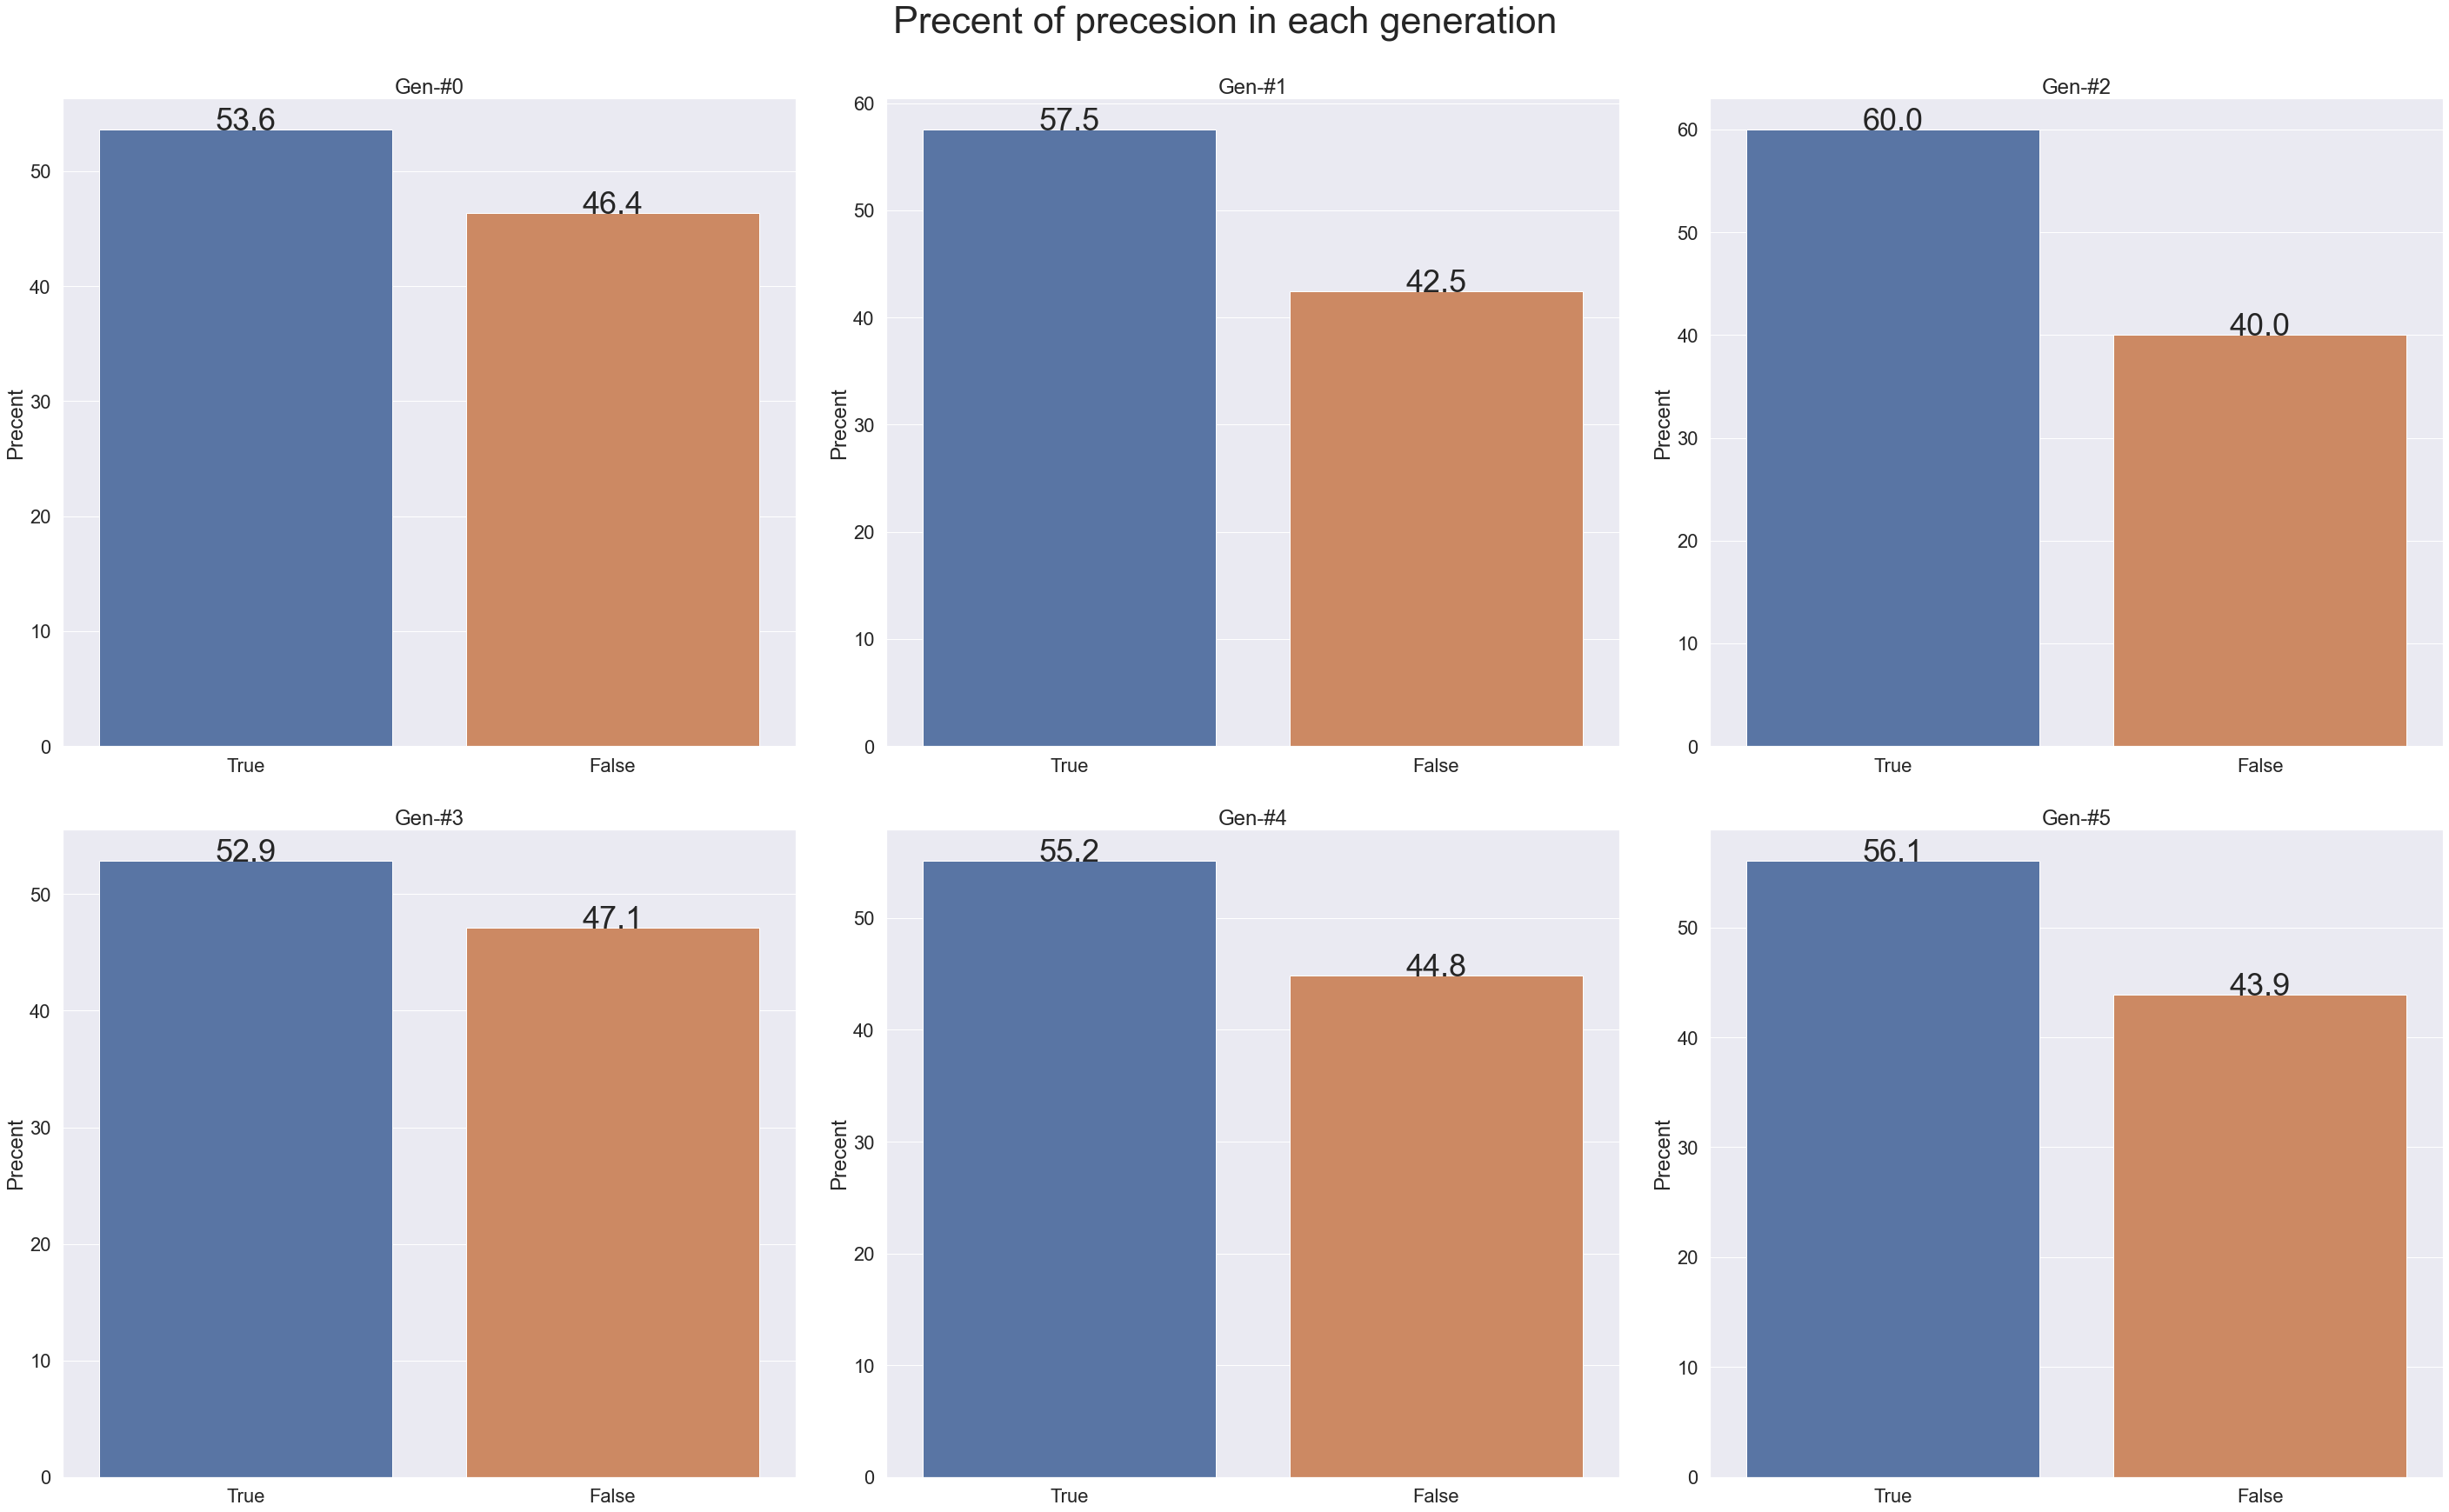

In [53]:
nrows,ncols = 2,3
bar_fig_arr = []
Gen = 0
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(40,25))
for r in range(nrows):
    for c in range(ncols): 
        sns.set(font_scale = 3)
        axes[r,c].title.set_text(f"Gen-#{Gen}")
        
        bar_fig = sns.barplot(x=["True","False"],y=df_temp[Gen].Precent.value_counts(normalize=True)*100,
                              ax=axes[r,c])
        Gen+=1
        for p in bar_fig.patches:
            bar_fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

        
fig.suptitle('Precent of precesion in each generation')        
fig.tight_layout()

## Prediction  conclusion 
-  In both regression & clustering the model was able to identify which pokemon is Legendary, <b>but</b> it also identified strong pokemon as Legendary.
-In every generation of the model, the "accuracy" is between 52 and 60 percent, based on checking the model's "actual" accuracy.
- My conclusion is that it is not possible to have high accuracy for predicting Legendary Pokemon with the Factor i chose, and the model i tried, perhaps a different model (Random forecast, DNN) will result in a better prediction. 